In [1]:
DATAPATH=''
try:
    # On Google Drive, set path to my drive / data directory.
    from google.colab import drive
    IN_COLAB = True
    PATH='/content/drive/'
    drive.mount(PATH)
    DATAPATH=PATH+'My Drive/data/'  # must end in "/"
except:
    # On home computer, set path to local data directory.
    IN_COLAB = False
    DATAPATH='C:/'  # must end in "/"

ZIP_FILE='BuildingData.zip'
ZIP_PATH = DATAPATH+ZIP_FILE
ELEC_FILE='electricity_cleaned.csv'
MODEL_FILE='Model'  # will be used later to save models

In [2]:
from os import listdir
import csv
from zipfile import ZipFile
import numpy as np
import pandas as pd
from pandas.plotting import autocorrelation_plot

from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA

import matplotlib.pyplot as plt
from matplotlib import colors
mycmap = colors.ListedColormap(['red','blue'])  # list color for label 0 then 1
np.set_printoptions(precision=2)

In [3]:
def read_zip_to_panda(zip_filename,csv_filename):
    zip_handle = ZipFile(zip_filename)
    csv_handle = zip_handle.open(csv_filename)
    panda = pd.read_csv(csv_handle)
    return panda

In [4]:
elec_df = read_zip_to_panda(ZIP_PATH,ELEC_FILE)
elec_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Columns: 1579 entries, timestamp to Mouse_science_Micheal
dtypes: float64(1578), object(1)
memory usage: 211.3+ MB


In [5]:
#Convert the DataTime
elec_df['timestamp'] = pd.to_datetime(elec_df['timestamp'], infer_datetime_format = True)
indexed_elec_df = elec_df.set_index(['timestamp'])

In [11]:
indexed_elec_df = indexed_elec_df.loc[:,'Panther_parking_Lorriane':'Panther_office_Hannah']

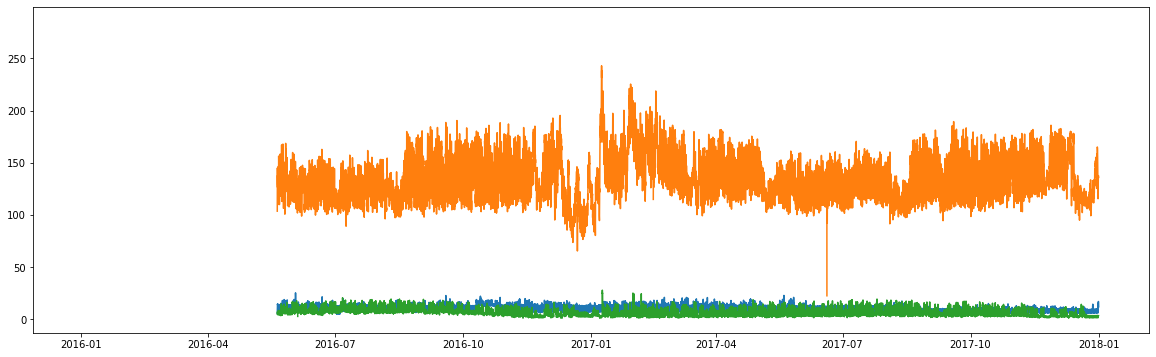

In [12]:
## Plot the graph
plt.figure(figsize=(20,6))
plt.plot (indexed_elec_df)

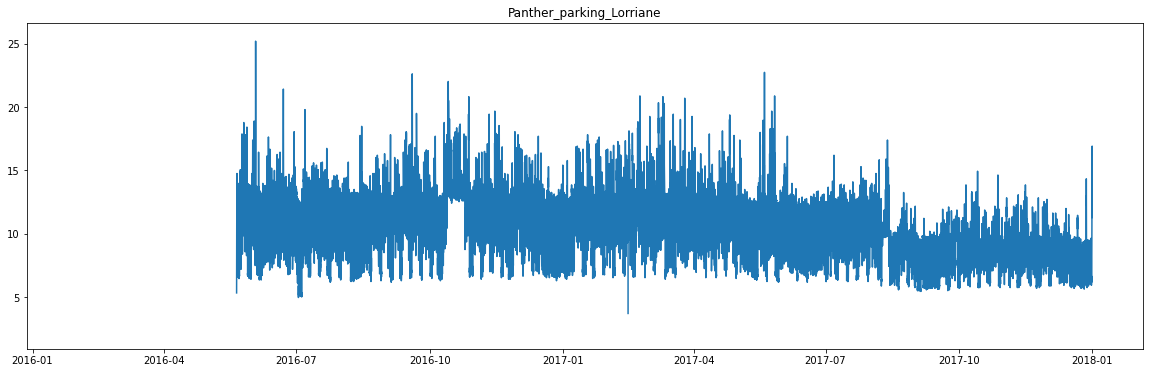

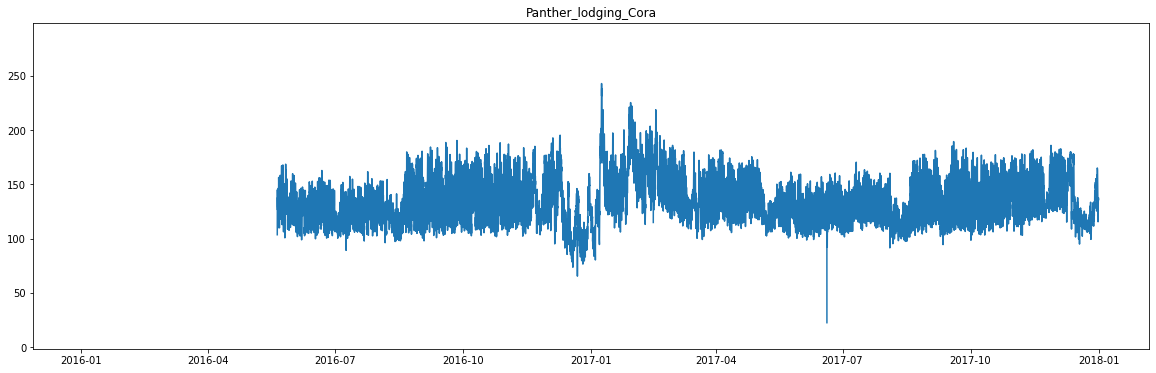

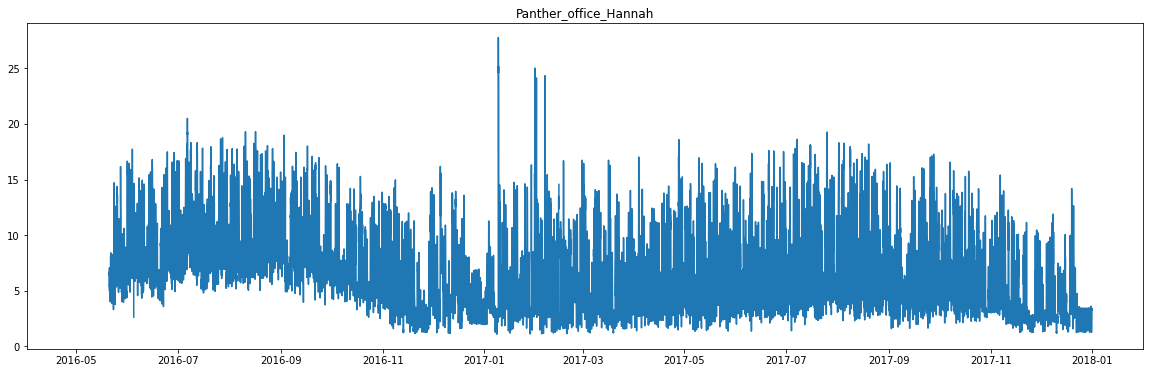

In [13]:
# Plot electrivity time series per building 
for building in indexed_elec_df:
    plt.figure(figsize=(20,6))
    plt.plot(indexed_elec_df[building])
    plt.title(building)
plt.show()

## Smoothing
